In [1]:
!pip install wordcloud

In [51]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from PIL import Image
import random
import re

In [6]:
with open('your_posts_1.html', encoding="utf8") as page:
    soup = BeautifulSoup(page, 'html.parser')

In [9]:
print(soup.prettify())

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <base href="../"/>
  <style nonce="1RzbAVPb" type="text/css">
   html{touch-action:manipulation}body{background:#fff;color:#1c1e21;direction:ltr;line-height:1.34;margin:0;padding:0;unicode-bidi:embed}body,button,input,label,select,td,textarea{font-family:Helvetica, Arial, sans-serif;font-size:12px}h1,h2,h3,h4,h5,h6{color:#1c1e21;font-size:13px;font-weight:600;margin:0;padding:0}h1{font-size:14px}h4,h5,h6{font-size:12px}p{margin:1em 0}b,strong{font-weight:600}a{color:#385898;cursor:pointer;text-decoration:none}button{margin:0}a:hover{text-decoration:underline}img{border:0}td,td.label{text-align:left}dd{color:#000}dt{color:#606770}ul{list-style-type:none;margin:0;padding:0}abbr{border-bottom:none;text-decoration:none}hr{background:#dadde1;border-width:0;color:#dadde1;height:1px}form{margin:0;padding:0}label{color:#606770;cursor:default;font-weight:600;vertical-align:middle}label input{font-weight:norm

In [10]:
contents = soup.find_all('div', class_="_2pin")

In [11]:
contents

[<div class="_2pin"><div><div><div><div><div><div></div></div></div></div></div></div></div>,
 <div class="_2pin"><div>Pepsi</div><div>Updated Feb 28, 2021, 10:42 PM</div><div></div></div>,
 <div class="_2pin"><div><div><div><div><div><div></div></div></div></div></div></div></div>,
 <div class="_2pin"><div>♥</div><div>Updated Feb 26, 2021, 5:31 PM</div><div></div></div>,
 <div class="_2pin"><div><div><div><div><div><div></div></div></div></div></div></div></div>,
 <div class="_2pin"><div>Naaaah, they are just neighbors. 😅😅</div><div>Updated Feb 25, 2021, 11:45 AM</div><div></div></div>,
 <div class="_2pin"><div><div><div><div><div><div></div></div></div></div></div></div></div>,
 <div class="_2pin"><div>Updated Feb 25, 2021, 12:10 AM</div><div></div></div>,
 <div class="_2pin"><div><div><div><div><div><div><a href="https://www.gmanetwork.com/news/lifestyle/familyandrelationships/777191/blackpink-s-jennie-and-bigbang-s-g-dragon-are-dating-reports/story/?utm_source=GMANews&amp;utm_mediu

In [12]:
x = []

for i in contents:
    x.append(i.get_text())

In [13]:
x

['',
 'PepsiUpdated Feb 28, 2021, 10:42 PM',
 '',
 '♥Updated Feb 26, 2021, 5:31 PM',
 '',
 'Naaaah, they are just neighbors. 😅😅Updated Feb 25, 2021, 11:45 AM',
 '',
 'Updated Feb 25, 2021, 12:10 AM',
 'https://www.gmanetwork.com/news/lifestyle/familyandrelationships/777191/blackpink-s-jennie-and-bigbang-s-g-dragon-are-dating-reports/story/?utm_source=GMANews&utm_medium=Facebook',
 '😭😭😭😭Updated Feb 24, 2021, 12:18 PM',
 'https://news.abs-cbn.com/entertainment/02/24/21/blackpinks-jennie-big-bangs-g-dragon-reportedly-dating',
 'NOOOOOOOOOOOOOOOUpdated Feb 24, 2021, 11:42 AM',
 'https://9gag.com/gag/aqjbE77/sc/hot?utm_source=Facebook&utm_medium=social&utm_campaign=link_post',
 'Updated Feb 24, 2021, 11:29 AM',
 '',
 '❤️Updated Feb 24, 2021, 11:17 AM',
 '',
 "Unless it's BLACKPINK 😂😂Updated Feb 24, 2021, 12:30 AM",
 'https://news.abs-cbn.com/business/02/23/21/data-of-33-million-cashalo-users-allegedly-sold-on-the-dark-web',
 'HmmmUpdated Feb 23, 2021, 10:50 PM',
 '',
 'Updated Feb 23, 2021,

In [72]:
p = re.compile('Updated')
to_remove = [ s for s in x if p.match(s) ]
to_remove

['Updated Feb 25, 2021, 12:10 AM',
 'Updated Feb 24, 2021, 11:29 AM',
 'Updated Feb 23, 2021, 1:44 AM',
 'Updated Feb 20, 2021, 11:51 AM',
 'Updated Feb 20, 2021, 10:58 AM',
 'Updated Feb 19, 2021, 4:47 PM',
 'Updated Feb 15, 2021, 9:04 AM',
 'Updated Feb 15, 2021, 9:02 AM',
 'Updated Feb 15, 2021, 8:59 AM',
 'Updated Feb 13, 2021, 9:21 AM',
 'Updated Feb 10, 2021, 8:49 AM',
 'Updated Feb 8, 2021, 2:45 PM',
 'Updated Feb 7, 2021, 9:56 PM',
 'Updated Feb 4, 2021, 11:53 PM',
 'Updated Jan 31, 2021, 3:24 PM',
 'Updated Jan 31, 2021, 3:05 PM',
 'Updated Jan 25, 2021, 12:02 AM',
 'Updated Jan 19, 2021, 5:59 PM',
 'Updated Jan 19, 2021, 5:58 PM',
 'Updated Jan 19, 2021, 5:57 PM',
 'Updated Jan 19, 2021, 1:48 PM',
 'Updated Jan 19, 2021, 11:07 AM',
 'Updated Jan 18, 2021, 11:57 PM',
 'Updated Jan 18, 2021, 11:56 PM',
 'Updated Jan 18, 2021, 10:16 PM',
 'Updated Jan 18, 2021, 6:43 PM',
 'Updated Jan 17, 2021, 7:10 PM',
 'Updated Jan 15, 2021, 11:11 AM',
 'Updated Jan 15, 2021, 12:15 AM',
 'Upd

In [73]:
new_x = [ i for i in x if i not in to_remove ]
new_x = [ i for i in new_x if i != '' ]
new_x

['PepsiUpdated Feb 28, 2021, 10:42 PM',
 '♥Updated Feb 26, 2021, 5:31 PM',
 'Naaaah, they are just neighbors. 😅😅Updated Feb 25, 2021, 11:45 AM',
 'https://www.gmanetwork.com/news/lifestyle/familyandrelationships/777191/blackpink-s-jennie-and-bigbang-s-g-dragon-are-dating-reports/story/?utm_source=GMANews&utm_medium=Facebook',
 '😭😭😭😭Updated Feb 24, 2021, 12:18 PM',
 'https://news.abs-cbn.com/entertainment/02/24/21/blackpinks-jennie-big-bangs-g-dragon-reportedly-dating',
 'NOOOOOOOOOOOOOOOUpdated Feb 24, 2021, 11:42 AM',
 'https://9gag.com/gag/aqjbE77/sc/hot?utm_source=Facebook&utm_medium=social&utm_campaign=link_post',
 '❤️Updated Feb 24, 2021, 11:17 AM',
 "Unless it's BLACKPINK 😂😂Updated Feb 24, 2021, 12:30 AM",
 'https://news.abs-cbn.com/business/02/23/21/data-of-33-million-cashalo-users-allegedly-sold-on-the-dark-web',
 'HmmmUpdated Feb 23, 2021, 10:50 PM',
 'Good goodUpdated Feb 22, 2021, 9:13 PM',
 'What a queen, niceee one 👏👏Updated Feb 21, 2021, 9:46 PM',
 'DamnUpdated Feb 20, 20

In [74]:
y = ' '.join(new_x)

In [75]:
y

'PepsiUpdated Feb 28, 2021, 10:42 PM ♥Updated Feb 26, 2021, 5:31 PM Naaaah, they are just neighbors. 😅😅Updated Feb 25, 2021, 11:45 AM https://www.gmanetwork.com/news/lifestyle/familyandrelationships/777191/blackpink-s-jennie-and-bigbang-s-g-dragon-are-dating-reports/story/?utm_source=GMANews&utm_medium=Facebook 😭😭😭😭Updated Feb 24, 2021, 12:18 PM https://news.abs-cbn.com/entertainment/02/24/21/blackpinks-jennie-big-bangs-g-dragon-reportedly-dating NOOOOOOOOOOOOOOOUpdated Feb 24, 2021, 11:42 AM https://9gag.com/gag/aqjbE77/sc/hot?utm_source=Facebook&utm_medium=social&utm_campaign=link_post ❤️Updated Feb 24, 2021, 11:17 AM Unless it\'s BLACKPINK 😂😂Updated Feb 24, 2021, 12:30 AM https://news.abs-cbn.com/business/02/23/21/data-of-33-million-cashalo-users-allegedly-sold-on-the-dark-web HmmmUpdated Feb 23, 2021, 10:50 PM Good goodUpdated Feb 22, 2021, 9:13 PM What a queen, niceee one 👏👏Updated Feb 21, 2021, 9:46 PM DamnUpdated Feb 20, 2021, 2:07 PM Aww 🥺Updated Feb 20, 2021, 10:57 AM Someday 

In [76]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60,100)

mask = np.array(Image.open("J.png"))

wordcloud = WordCloud(background_color='black', mask=mask)
wordcloud.generate(y)

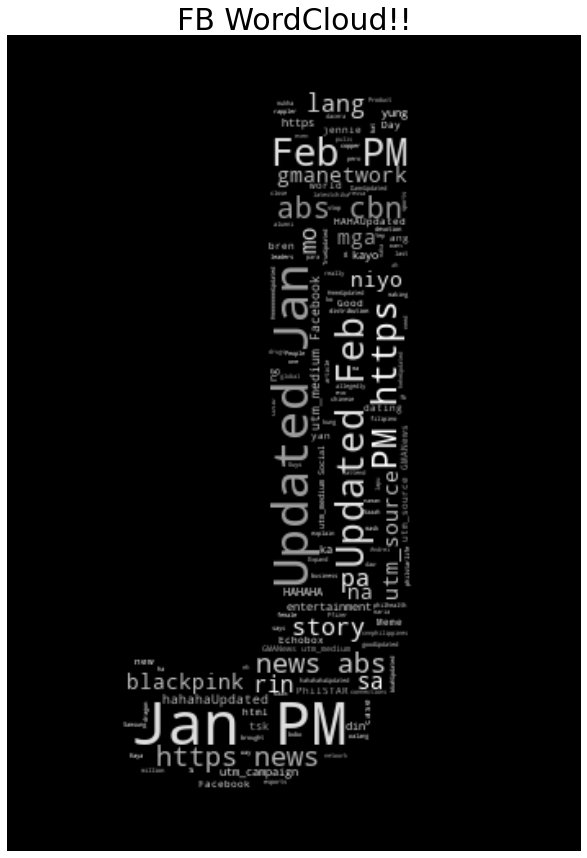

In [77]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), \
           interpolation='bilinear')
plt.axis("off")
plt.title("FB WordCloud!!", fontsize=30)
plt.show()